<a href="https://colab.research.google.com/github/Fatima-Usf/Debuging-ML-code/blob/main/MLDebugs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import numpy as np
from sklearn.datasets import fetch_openml
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
#Import Bagging ensemble model
# -> first error is BaggingClassifier - one s missing
from sklearn.ensemble import BaggingClassifier
#Import Tree model as a base classifier
from sklearn import tree

In [ ]:
print(__doc__)


Automatically created module for IPython interactive environment


In [ ]:
# Turn down for faster convergence
train_samples = 5000

In [ ]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version = 1, return_X_y = True)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
# Split dataset into training set and test set
# 70% training and 30% test
# -> Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size = 0.3, we should add the random state here
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [ ]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
#Create a Bagging Ensemble Classifier
#BaggingClassifier(base_estimator = None, n_estimators = 10, max_samples= 1.0, max_features = 1.0, bootstrap = True, bootstrap_features = False, oob_ score = False,warm_start = False, n_jobs = None, random_state = None, verbose = 0)
bagging = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples = 0.5, max_features = 0.5)
#Train the model using the training sets
bagging.fit(Xtrain,ytrain)
#Predict the response for test dataset
ypred = bagging.predict(Xtest)


In [ ]:
#Evaluate the Model and Print Performance Metrics

from sklearn import metrics
print('Accuracy:', np.round(metrics.accuracy_score(ytest,ypred),4))
print('Precision:', np.round(metrics.precision_score(ytest,ypred,average = 'weighted'),4))
print('Recall:', np.round(metrics.recall_score(ytest,ypred, average = 'weighted'),4))
print('F1 Score:', np.round(metrics.f1_score(ytest,ypred, average = 'weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(ytest,ypred),4))
print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(ytest,ypred),4))
print('\t\tClassification Report:\n', metrics.classification_report(ypred,ytest))

Accuracy: 0.9412
Precision: 0.9413
Recall: 0.9412
F1 Score: 0.9412
Cohen Kappa Score: 0.9346
Matthews Corrcoef: 0.9347
		Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2015
           1       0.98      0.97      0.97      2417
           2       0.95      0.90      0.92      2204
           3       0.92      0.93      0.92      2188
           4       0.94      0.93      0.93      2023
           5       0.92      0.94      0.93      1874
           6       0.95      0.96      0.96      2002
           7       0.95      0.96      0.95      2185
           8       0.91      0.93      0.92      2027
           9       0.91      0.93      0.92      2065

    accuracy                           0.94     21000
   macro avg       0.94      0.94      0.94     21000
weighted avg       0.94      0.94      0.94     21000



Confusion Matrix:
 [[1937    2   14    2    2    6    4    1   10    0]
 [   1 2352   19    9    5    5    6    5    7    1]
 [  14    2 1983   32   11    0   11   21   13    6]
 [   7    5   61 2024    2   36    1   20   25   18]
 [   8    2   11    6 1882    8   12    6   11   57]
 [  11    9   11   45   11 1753   24    2   27    7]
 [  18    4   22    0   16   15 1930    0   15    1]
 [   2   15   34   18   15    0    0 2089    6   18]
 [   9   20   29   28   23   29   13    7 1888   30]
 [   8    6   20   24   56   22    1   34   25 1927]]


Text(89.18, 0.5, 'predicted label')

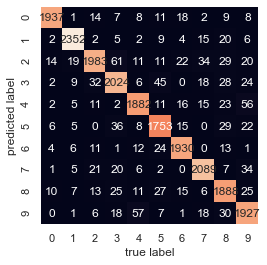

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(ytest, ypred))
#Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
from io import BytesIO #neded for plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
plt.savefig("Confusion.jpg")
# Save SVG in a fake file object.
f = BytesIO()
plt.savefig(f, format = "svg")

<Figure size 432x288 with 0 Axes>